In [20]:
import tensorflow as tf


1. MNIST Dataset

In [21]:
data = tf.keras.datasets.mnist

2. Loading MNIST Dataset

In [35]:
(X_train, y_train), (X_test, y_test) = data.load_data()

In [36]:
X_train.shape

(60000, 28, 28)

In [37]:
y_test.shape

(10000,)

3. Representing Data

In [38]:
import numpy as np
import matplotlib.pyplot as plt

(60000, 28, 28)
(10000, 28, 28)
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 

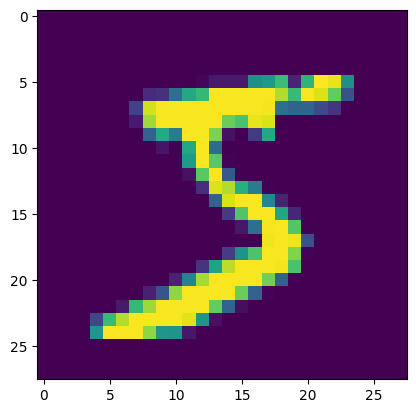

In [39]:
np.set_printoptions(linewidth=200)
plt.imshow(X_train[0])
print(X_train.shape)
print(X_test.shape)
print(y_train[0])
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 

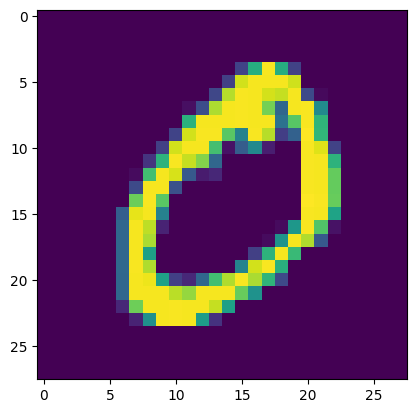

In [40]:
np.set_printoptions(linewidth=200)
plt.imshow(X_train[1])
print(X_train.shape)
print(X_test.shape)
print(y_train[1])
print(X_train[1])

4. Normalizing the data

In [41]:
X_train, X_test = X_train/255.0, X_test/255.0

5. Creating NN and Training the Data

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [48]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.99:  # Stop training if accuracy reaches 99%
            print("\nReached 99% accuracy, so stopping training.")
            self.model.stop_training = True

In [49]:
callbacks = myCallback()

In [50]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8999 - loss: 0.3355
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9748 - loss: 0.0836
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.9847 - loss: 0.0500
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9899 - loss: 0.0332
Epoch 5/50
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9914 - loss: 0.0267
Reached 99% accuracy, so stopping training.
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - accuracy: 0.9914 - loss: 0.0267


In [52]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9740 - loss: 0.0874


[0.07151178270578384, 0.9779999852180481]